# Titani Survival Prediction

## Description

### Objective:
Developed a machine learning model to predict the survival chances of passengers aboard the Titanic based on features like age, gender, ticket class, and more.

### Tools Used:
    
Programming Language: Python
    
Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

### Approach:

#### Data Preprocessing:

Cleaned the dataset by handling missing values, encoding categorical variables, and scaling numerical features.
Explored the dataset to identify correlations and visualize key patterns (e.g., survival rates based on ticket class or gender).

#### Feature Engineering:

Created new features (e.g., family size, title extraction) to enhance model performance.

#### Model Building:

Trained and compared various classification models, such as Logistic Regression, Decision Trees, Random Forests, and Gradient Boosting.
Optimized hyperparameters using GridSearchCV for the best model.

#### Evaluation:

Evaluated model performance using metrics like accuracy, precision, recall

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
data=pd.read_csv("C:\\Users\\Tiger Syam\\Desktop\\IBM coursera\\SuperwisedML-Classification\\Projects\\TtanicSurvivalPrediction\\Datasets\\train.csv")


In [3]:
dataset=data.copy()

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Data Preprocessing 

now,try to get some info about dataset

In [5]:
cols=data.columns.tolist()  #all columns

In [7]:
cat_cols=data.select_dtypes(include=['object']).columns.tolist()# categorical columns
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [8]:
num_cols=data.select_dtypes(include=['int64','float64']).columns.tolist() #numeric columns
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


here the columns age ,cabin,Embarked...seems to has null values....

##### Data Cleaning


In [10]:
#Handling Misiing Values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#missing percentage
for col in cols:
    null_sum=data[col].isnull().sum()
    print("The column '{}' has missing values percentage {}%".format(col,((null_sum)/891)*100))
    

The column 'PassengerId' has missing values percentage 0.0%
The column 'Survived' has missing values percentage 0.0%
The column 'Pclass' has missing values percentage 0.0%
The column 'Name' has missing values percentage 0.0%
The column 'Sex' has missing values percentage 0.0%
The column 'Age' has missing values percentage 19.865319865319865%
The column 'SibSp' has missing values percentage 0.0%
The column 'Parch' has missing values percentage 0.0%
The column 'Ticket' has missing values percentage 0.0%
The column 'Fare' has missing values percentage 0.0%
The column 'Cabin' has missing values percentage 77.10437710437711%
The column 'Embarked' has missing values percentage 0.22446689113355783%


here,the missing values percentage of Cabin is almost 77% .....so,,it seems unuseful for keeping in our dataset.....so removing the Cabin column

In [12]:
#drop cabin column
data=data.drop('Cabin',axis=1)


In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


age has missing percentage of 19% .....lets first try by removing rows of age column which are having null values

In [14]:
data.dropna(inplace=True,axis=0)

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


now,our data is free from missing values

In [17]:
#duplicate values
data.duplicated().sum()

0

so,,its also clear that our dataset has no duplicates

##### Handling Outliers

now,look for ouliers

Below are some of the techniques of detecting outliers:-

Boxplots

Z-score

Inter Quantile Range(IQR)

In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


now,try to plot boxplots

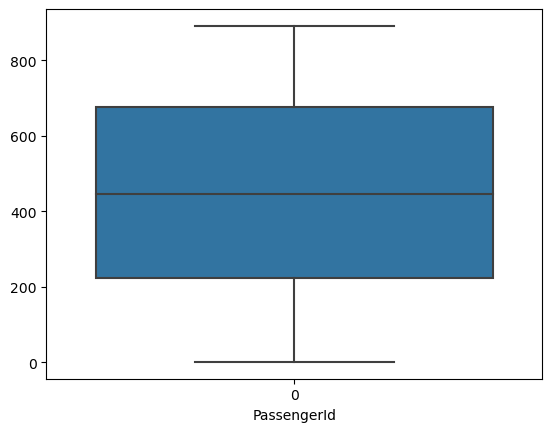

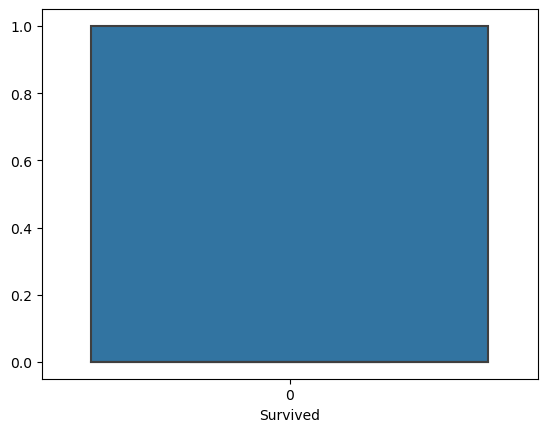

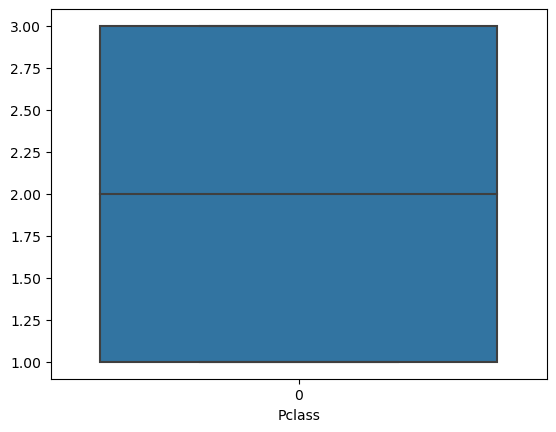

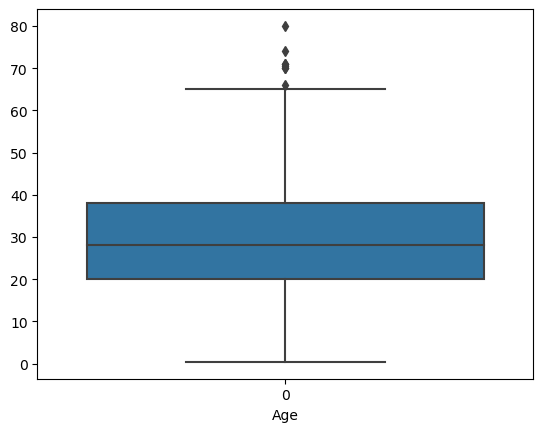

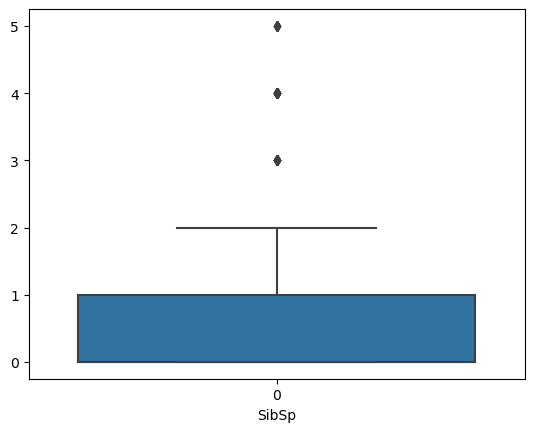

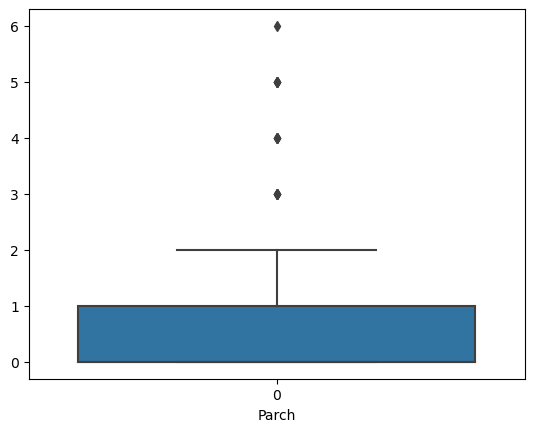

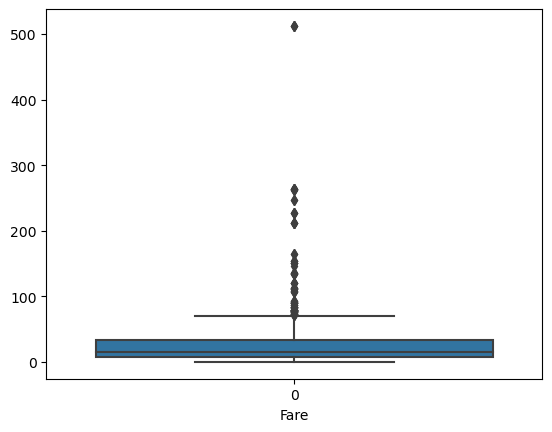

In [19]:
fig=plt.subplots()

for col in num_cols:
    ax=sns.boxplot(data[col])
    plt.xlabel(col)
    plt.show()




In [20]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5], dtype=int64)

In [21]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

here,from box plots ....column age,sibsp,Parch,Fare plotted as having some outliers.....

SibSp,Parch are encoded columns ....

so,,considering outliers for "Fare" column

Text(0.5, 0, 'Fare')

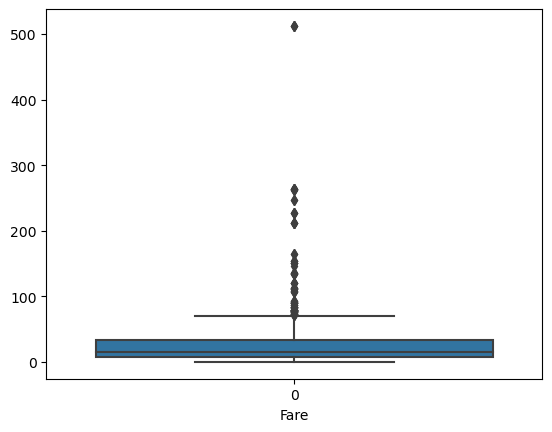

In [22]:
sns.boxplot(data["Fare"])
plt.xlabel('Fare')

In [23]:
#zscore analysis
outliers=[]
thresh=3
def detect_outliers_zscore(data):
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if(abs(z_score)>thresh):
            outliers.append(i)
        
    return outliers


detect_outliers_zscore(data['Fare'])





[263.0,
 263.0,
 247.5208,
 512.3292,
 247.5208,
 262.375,
 263.0,
 211.5,
 227.525,
 263.0,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375]

I think ,it would also better ,in case where we not considered the outlier

so..lets continue with model building ....if there is any case of accuracy low.....i will repeat the datapreprocessing again......

##### Feature Selection and Transformation

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 82.9+ KB


In [24]:
data.nunique()

PassengerId    712
Survived         2
Pclass           3
Name           712
Sex              2
Age             88
SibSp            6
Parch            7
Ticket         541
Fare           219
Embarked         3
dtype: int64

i think ,name ,id,ticket are not that much important in our prediction...so remove those columns 

In [26]:
features=['Survived',"Pclass",'Sex','Age','SibSp','Parch','Fare','Embarked']

In [27]:
data[features]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [28]:
data[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 66.2+ KB


Sex,Embarked are categorical columns ...so i am  transforming into numerical_columns

In [29]:
#encoding 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])


In [30]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [31]:
data.corr()['Survived']

C:\Users\Tiger Syam\AppData\Local\Temp\ipykernel_1176\772106998.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Survived']


PassengerId    0.029526
Survived       1.000000
Pclass        -0.356462
Sex           -0.536762
Age           -0.082446
SibSp         -0.015523
Parch          0.095265
Fare           0.266100
Embarked      -0.181979
Name: Survived, dtype: float64

<Axes: >

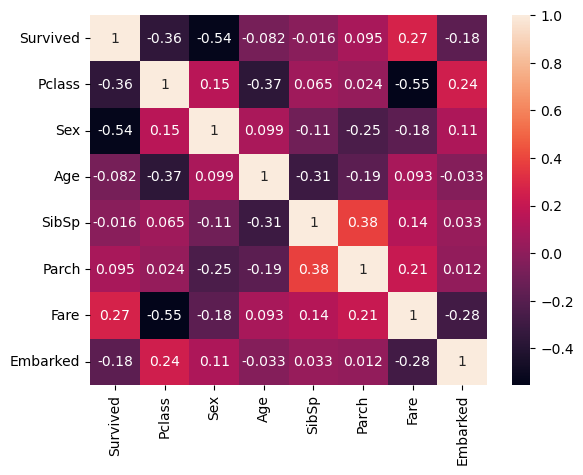

In [32]:
sns.heatmap(data[features].corr(),annot=True)

#### Train/test Split

here, our target variable is Survived

In [91]:
X=data[features].drop('Survived',axis=1)
y=data['Survived']
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
889,1,1,26.0,0,0,30.0000,0


In [92]:
classes=data['Survived'].unique()
classes

array([0, 1], dtype=int64)

 0-> not survived and 1-> not_Survived

In [93]:
data['Survived'].value_counts(normalize=True)

0    0.595506
1    0.404494
Name: Survived, dtype: float64

since,it is balanced classes we can use train/test split

In [94]:
#import
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=123)



##### Evaluate functions

In [95]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_recall_fscore_support

In [96]:
def get_score(X_train,X_test,y_train,y_test,model):
    
    result={}
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision,recall,f_score,_=precision_recall_fscore_support(y_test,y_pred,average='binary')
    result["accuracy"]=accuracy
    result['Precision']=precision
    result['recall']=recall
    result['f_score']=f_score
    
    return result
    
    
    

In [97]:
def get_accuracy_score(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"trian Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

#### Model Building

we,have binary classification...

buid models:-

->LogisticRegression

->KNN

->Support Vector machines

->Decision Tree Classifier

->RandomTreeClassifier


##### LogisticRegression

In [98]:
#import 
from sklearn.linear_model import LogisticRegression

In [99]:
X_train_s=StandardScaler().fit_transform(X_train)
X_test_s=StandardScaler().fit_transform(X_test)

In [100]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
y_pred_lr=lr.predict(X_test)

In [102]:
get_score(X_train,X_test,y_train,y_test,lr)

{'accuracy': 0.8181818181818182,
 'Precision': 0.7962962962962963,
 'recall': 0.7413793103448276,
 'f_score': 0.7678571428571429}

In [224]:
get_accuracy_score(X_train,X_test,y_train,y_test,lr)

{'test Accuracy': 0.8181818181818182, 'trian Accuracy': 0.8084358523725835}

##### GridSearchCV

In [104]:
#import
from sklearn.model_selection import GridSearchCV

In [105]:
params_grid={'penalty':['l1','l2','elasticnet'],
             'C':[0.01,0.05,0.07,0.1,0.5,0.7,1,2,5,8,10,15,20],
             'solver':['liblinear','lbfgs','saga','newton-cg'],
             'max_iter':[20,50,100,150,200,500,1000]
             
            }

In [106]:
search_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_grid,scoring='accuracy',cv=3,n_jobs=-1,verbose=True)
search_lr.fit(X_train,y_train)

Fitting 3 folds for each of 1092 candidates, totalling 3276 fits


C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1638 fits failed out of a total of 3276.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
273 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Tiger Syam\AppData\Roamin

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.07, 0.1, 0.5, 0.7, 1, 2, 5, 8, 10,
                               15, 20],
                         'max_iter': [20, 50, 100, 150, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']},
             scoring='accuracy', verbose=True)

In [107]:
search_lr.best_params_

{'C': 2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [109]:
best_model_lr=search_lr.best_estimator_
best_model_lr

LogisticRegression(C=2)

In [110]:
search_lr.best_score_

0.7909588786781768

In [111]:
best_model_lr

LogisticRegression(C=2)

In [113]:
get_accuracy_score(X_train,X_test,y_train,y_test,best_model_lr)

{'test Accuracy': 0.8181818181818182, 'trian Accuracy': 0.804920913884007}

In [114]:
get_score(X_train,X_test,y_train,y_test,best_model_lr)

{'accuracy': 0.8181818181818182,
 'Precision': 0.7962962962962963,
 'recall': 0.7413793103448276,
 'f_score': 0.7678571428571429}

this, is the  score of our LogisticRegression model.....

got about 80% accuracy...seems to be good model

##### KNN

In [115]:
#import 
from sklearn.neighbors import KNeighborsClassifier

In [238]:
kn=KNeighborsClassifier()
kn.fit(X_train_s,y_train)

KNeighborsClassifier()

In [239]:
get_accuracy_score(X_train_s,X_test_s,y_train,y_test,kn)

{'test Accuracy': 0.8321678321678322, 'trian Accuracy': 0.8418277680140598}

In [118]:
get_score(X_train_s,X_test_s,y_train,y_test,kn)

{'accuracy': 0.8321678321678322,
 'Precision': 0.7931034482758621,
 'recall': 0.7931034482758621,
 'f_score': 0.7931034482758621}

In [119]:
from sklearn.model_selection import cross_val_score


In [124]:
x=StandardScaler().fit_transform(X)

In [128]:
scores_s=cross_val_score(kn,x,y,cv=3)     #with scaled data ['x']
scores_s

array([0.77310924, 0.81012658, 0.80590717])

In [129]:
scores=cross_val_score(kn,X,y,cv=3)          #with unscaled data ['X']
scores

array([0.63865546, 0.68776371, 0.70042194])

##### HyperParameterTuning

In [130]:
max_k=50
f1_scores=[]
from sklearn.metrics import f1_score

In [131]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train_s, y_train.values.ravel())
    preds = knn.predict(X_test_s)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.7321
2,0.7400
3,0.8142
4,0.7619
5,0.7931
6,0.7619
7,0.7523
8,0.7429
9,0.7523


for f_score....k=3 get high f_score

Text(0.5, 1.0, 'KNN F1 Score')

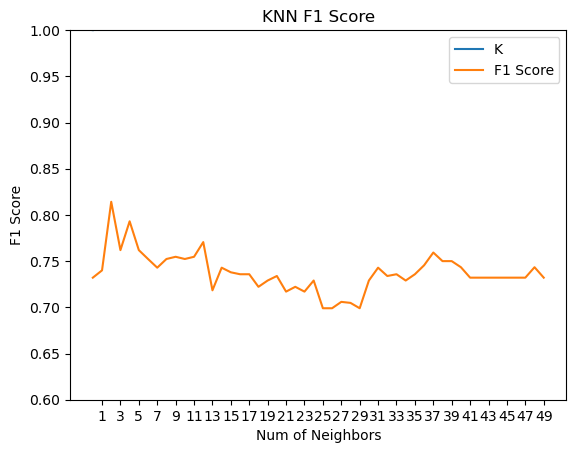

In [132]:
ax=f1_results.plot()
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.6, 1))
plt.title('KNN F1 Score')

our,KNeighborsClassifier model also got 80% accuracy....

##### SupportVectorMachine

In [133]:
#import
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [134]:
model_svm=SVC()
model_svm.fit(X_train,y_train)

SVC()

In [136]:
get_accuracy_score(X_train,X_test,y_train,y_test,model_svm)

{'test Accuracy': 0.6783216783216783, 'trian Accuracy': 0.6783831282952548}

In [137]:
get_score(X_train,X_test,y_train,y_test,model_svm)

{'accuracy': 0.6783216783216783,
 'Precision': 0.7307692307692307,
 'recall': 0.3275862068965517,
 'f_score': 0.4523809523809524}

here,this svm model fails.......lets try with hyperparameter tuning

##### GridSearchCV

In [138]:
#import
from sklearn.model_selection import GridSearchCV

In [139]:
params_grid={'kernel':['rbf','sigmoid','linear','poly'],
             'C':[.1,.5,.7,.8,1,5,8,10,15]
             
            }

In [140]:
search_svm=GridSearchCV(estimator=SVC(),param_grid=params_grid,scoring='accuracy',cv=3)
search_svm.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 0.7, 0.8, 1, 5, 8, 10, 15],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
             scoring='accuracy')

In [141]:
search_svm.best_params_

{'C': 8, 'kernel': 'linear'}

In [143]:
best_model_svm=search_svm.best_estimator_
best_model_svm

SVC(C=8, kernel='linear')

In [144]:
search_svm.best_score_

0.775132275132275

In [157]:
get_score(X_train,X_test,y_train,y_test,best_model_svm)

{'accuracy': 0.7972027972027972,
 'Precision': 0.7636363636363637,
 'recall': 0.7241379310344828,
 'f_score': 0.7433628318584072}

In [170]:
get_accuracy_score(X_train,X_test,y_train,y_test,best_model_svm)

{'test Accuracy': 0.7972027972027972, 'trian Accuracy': 0.7750439367311072}

here,KNN model gives 79% of accuracy ......its not bad...

##### DecisionTreeClassifier

In [171]:
#import
from sklearn.tree import DecisionTreeClassifier

In [172]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [173]:
get_accuracy_score(X_train,X_test,y_train,y_test,dt)

{'test Accuracy': 0.7622377622377622, 'trian Accuracy': 0.9876977152899824}

In [174]:
get_score(X_train,X_test,y_train,y_test,dt)

{'accuracy': 0.7622377622377622,
 'Precision': 0.7222222222222222,
 'recall': 0.6724137931034483,
 'f_score': 0.6964285714285714}

here,...seems the model is overfitted

##### GridSearchCV

In [175]:
#import
from sklearn.model_selection import GridSearchCV

In [176]:
params_grid={'max_depth':[1,2,5,10,12,15,20],
             'max_features':['sqrt','log2'],
             'criterion':['gini','entropy','log_loss']
            }

In [177]:
search_dt=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params_grid,scoring='accuracy',cv=3)
search_dt.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 5, 10, 12, 15, 20],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [178]:
search_dt.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2'}

In [179]:
model=search_dt.best_estimator_
model


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2')

In [180]:
search_dt.best_score_

0.776849531235496

In [181]:
d=DecisionTreeClassifier(criterion='entropy',max_depth=4)
d.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [182]:
get_score(X_train,X_test,y_train,y_test,d)

{'accuracy': 0.8321678321678322,
 'Precision': 0.8541666666666666,
 'recall': 0.7068965517241379,
 'f_score': 0.7735849056603773}

In [183]:
get_score(X_train,X_test,y_train,y_test,model)

{'accuracy': 0.7552447552447552,
 'Precision': 0.8484848484848485,
 'recall': 0.4827586206896552,
 'f_score': 0.6153846153846154}

In [184]:
get_accuracy_score(X_train,X_test,y_train,y_test,model)

{'test Accuracy': 0.7552447552447552, 'trian Accuracy': 0.7662565905096661}

In [185]:
get_accuracy_score(X_train,X_test,y_train,y_test,d)

{'test Accuracy': 0.8321678321678322, 'trian Accuracy': 0.8295254833040422}

we fitted the overfitting issue of our model

In [186]:
best_model_dt=d
best_model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [187]:
get_score(X_train,X_test,y_train,y_test,best_model_dt)

{'accuracy': 0.8321678321678322,
 'Precision': 0.8541666666666666,
 'recall': 0.7068965517241379,
 'f_score': 0.7735849056603773}

In [188]:
get_accuracy_score(X_train,X_test,y_train,y_test,best_model_dt)

{'test Accuracy': 0.8321678321678322, 'trian Accuracy': 0.8295254833040422}

decisionTreeModel works with accuracy about 80% accuracy

##### RandomForestClassifier

In [189]:
#import
from sklearn.ensemble import RandomForestClassifier

In [190]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [191]:
get_accuracy_score(X_train,X_test,y_train,y_test,rf)

{'test Accuracy': 0.8321678321678322, 'trian Accuracy': 0.9876977152899824}

In [192]:
get_score(X_train,X_test,y_train,y_test,rf)

{'accuracy': 0.8321678321678322,
 'Precision': 0.8541666666666666,
 'recall': 0.7068965517241379,
 'f_score': 0.7735849056603773}

here,our model works well on training data with 98% accuracy...but it doesnt on our unseen data......it seems that our model overfitted

##### GridSearchCV                                      #RandomForest

In [193]:
#import
from sklearn.model_selection import GridSearchCV

In [194]:
params_grid={'n_estimators':[10,15,20,25,30,40,50,70,100,120,150,200],
             'max_depth':[2*n+1 for n in range(30)],
             'max_features':['sqrt','log2']
            }

In [195]:
search_rf=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params_grid,cv=3,scoring='accuracy',n_jobs=-1)
search_rf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                       23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                       43, 45, 47, 49, 51, 53, 55, 57, 59],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 15, 20, 25, 30, 40, 50, 70, 100,
                                          120, 150, 200]},
             scoring='accuracy')

In [196]:
search_rf.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 30}

In [197]:
model_rf=search_rf.best_estimator_
model_rf

RandomForestClassifier(max_depth=5, n_estimators=30)

In [198]:
get_accuracy_score(X_train,X_test,y_train,y_test,model_rf)

{'test Accuracy': 0.8391608391608392, 'trian Accuracy': 0.8646748681898067}

In [199]:
get_score(X_train,X_test,y_train,y_test,model_rf)

{'accuracy': 0.8391608391608392,
 'Precision': 0.8888888888888888,
 'recall': 0.6896551724137931,
 'f_score': 0.7766990291262136}

In [204]:
best_model_rf=model_rf
best_model_rf

RandomForestClassifier(max_depth=5, n_estimators=30)

RandomForest work with accuracy 84%

##### AdaboostClassifier

In [206]:
#import
from sklearn.ensemble import AdaBoostClassifier

In [207]:
ab=AdaBoostClassifier(random_state=0,n_estimators=10)
ab.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=0)

In [208]:
get_accuracy_score(X_train,X_test,y_train,y_test,ab)

{'test Accuracy': 0.8111888111888111, 'trian Accuracy': 0.8084358523725835}

In [209]:
[ ("for weak classifiers {} the we get ".format(i+1),get_accuracy_score(X_train, X_test, y_train, y_test,  weak_classifiers)) for i,weak_classifiers in enumerate(ab.estimators_)]

C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Us

[('for weak classifiers 1 the we get ',
  {'test Accuracy': 0.7972027972027972, 'trian Accuracy': 0.7750439367311072}),
 ('for weak classifiers 2 the we get ',
  {'test Accuracy': 0.6503496503496503, 'trian Accuracy': 0.6678383128295254}),
 ('for weak classifiers 3 the we get ',
  {'test Accuracy': 0.6013986013986014, 'trian Accuracy': 0.6115992970123023}),
 ('for weak classifiers 4 the we get ',
  {'test Accuracy': 0.6783216783216783, 'trian Accuracy': 0.6766256590509666}),
 ('for weak classifiers 5 the we get ',
  {'test Accuracy': 0.43356643356643354,
   'trian Accuracy': 0.43936731107205623}),
 ('for weak classifiers 6 the we get ',
  {'test Accuracy': 0.4755244755244755, 'trian Accuracy': 0.4797891036906854}),
 ('for weak classifiers 7 the we get ',
  {'test Accuracy': 0.40559440559440557,
   'trian Accuracy': 0.4235500878734622}),
 ('for weak classifiers 8 the we get ',
  {'test Accuracy': 0.6223776223776224, 'trian Accuracy': 0.6379613356766256}),
 ('for weak classifiers 9 the w

##### GridSearchCV

In [210]:
#import
from sklearn.model_selection import GridSearchCV

In [211]:
params_grid={'learning_rate':[0.1*(n+1) for n in range(20)],
             'n_estimators' : [2*n+1 for n in range(10)],
             'algorithm':['SAMME', 'SAMME.R']
            }
            

In [212]:
search_ab=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=params_grid,scoring='accuracy')
search_ab.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5, 0.6000000000000001,
                                           0.7000000000000001, 0.8, 0.9, 1.0,
                                           1.1, 1.2000000000000002, 1.3,
                                           1.4000000000000001, 1.5, 1.6,
                                           1.7000000000000002, 1.8,
                                           1.9000000000000001, 2.0],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

In [213]:
search_ab.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 11}

In [214]:
model_ab=search_ab.best_estimator_
model_ab

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5, n_estimators=11)

In [215]:
search_ab.best_score_

0.8031672100605496

In [216]:
get_score(X_train,X_test,y_train,y_test,model_ab)

{'accuracy': 0.7902097902097902,
 'Precision': 0.75,
 'recall': 0.7241379310344828,
 'f_score': 0.736842105263158}

In [217]:
get_accuracy_score(X_train,X_test,y_train,y_test,model_ab)

{'test Accuracy': 0.7902097902097902, 'trian Accuracy': 0.7838312829525483}

In [218]:
abc=AdaBoostClassifier(random_state=0,learning_rate=1,n_estimators=50)
abc.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, random_state=0)

In [219]:
get_score(X_train,X_test,y_train,y_test,abc)

{'accuracy': 0.8321678321678322,
 'Precision': 0.7931034482758621,
 'recall': 0.7931034482758621,
 'f_score': 0.7931034482758621}

In [220]:
get_accuracy_score(X_train,X_test,y_train,y_test,abc)

{'test Accuracy': 0.8321678321678322, 'trian Accuracy': 0.8418277680140598}

In [221]:
best_model_abc=abc
best_model_abc

AdaBoostClassifier(learning_rate=1, random_state=0)

In [222]:
get_accuracy_score(X_train,X_test,y_train,y_test,best_model_abc)

{'test Accuracy': 0.8321678321678322, 'trian Accuracy': 0.8418277680140598}

our,AdaBoostClassifier model works with accuracy 84%

In [246]:
final_results={}

final_results['LogisticRegression']=get_accuracy_score(X_train,X_test,y_train,y_test,best_model_lr)['test Accuracy']
final_results['KNeighborsClassifier']=get_accuracy_score(X_train_s,X_test_s,y_train,y_test,kn)['test Accuracy']
final_results['SVC']=get_accuracy_score(X_train,X_test,y_train,y_test,best_model_svm)['test Accuracy']
final_results['DecisionTree']=get_accuracy_score(X_train,X_test,y_train,y_test,best_model_dt)['test Accuracy']
final_results['RandomForest']=get_accuracy_score(X_train,X_test,y_train,y_test,best_model_rf)['test Accuracy']
final_results['AdaBoost']=get_accuracy_score(X_train,X_test,y_train,y_test,best_model_abc)['test Accuracy']
final_results

{'LogisticRegression': 0.8181818181818182,
 'KNeighborsClassifier': 0.8321678321678322,
 'SVC': 0.7972027972027972,
 'DecisionTree': 0.8321678321678322,
 'RandomForest': 0.8391608391608392,
 'AdaBoost': 0.8321678321678322}

In [247]:
final_results_s=pd.Series(final_results)
final_results_s

LogisticRegression      0.818182
KNeighborsClassifier    0.832168
SVC                     0.797203
DecisionTree            0.832168
RandomForest            0.839161
AdaBoost                0.832168
dtype: float64

Below are the best_models and best_scores on this Titanic Datset......

In [248]:
final_results_df=pd.DataFrame(final_results_s).reset_index().rename(columns={'index':'Model',0:'Best_accuracy'})
final_results_df

,Model,Best_accuracy
0,LogisticRegression,0.818182
1,KNeighborsClassifier,0.832168
2,SVC,0.797203
3,DecisionTree,0.832168
4,RandomForest,0.839161
5,AdaBoost,0.832168


### Thank You

#### By Tiger_Syam